# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
reg_1 = smf.ols('tip_pct ~ net_bill', data = tips).fit()

In [4]:
print(reg_1.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           1.52e-06
Time:                        17:01:57   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

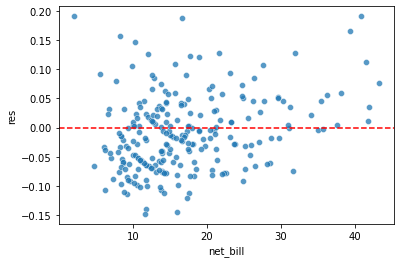

In [25]:
tips['res'] = reg_1.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips[tips['tip_pct']<0.5], alpha = .75)
plt.axhline(y=0, color='r', linestyle='--');

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [5]:
reg_2 = smf.ols('tip_pct ~ np.log(net_bill)', data = tips).fit()

In [7]:
print(reg_2.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           1.62e-13
Time:                        17:03:08   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054  

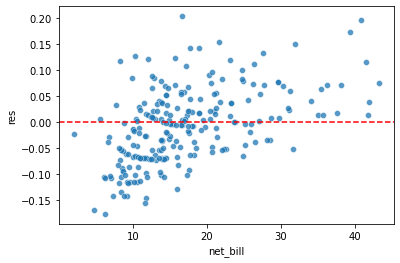

In [26]:
tips['res'] = reg_2.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips[tips['tip_pct']<0.5], alpha = .75)
plt.axhline(y=0, color='r', linestyle='--');

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [9]:
reg_3 = smf.ols('tip_pct ~ net_bill + np.power(net_bill, 2)', data = tips).fit()

In [10]:
print(reg_3.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           1.06e-09
Time:                        17:05:55   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

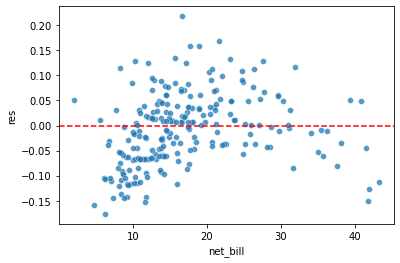

In [28]:
tips['res'] = reg_3.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips[tips['tip_pct']<0.5], alpha = .75)
plt.axhline(y=0, color='r', linestyle='--');

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [11]:
reg_4 = smf.ols('np.log(tip_pct) ~ net_bill', data = tips).fit()

In [16]:
tips['pred4_y'] = np.exp(reg_4.fittedvalues)
tips[['pred4_y', 'net_bill']].corr().iloc[0,1]**2

0.9816827488318465

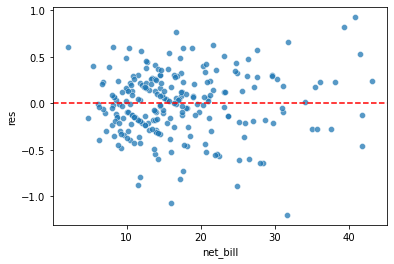

In [29]:
tips['res'] = reg_4.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips[tips['tip_pct']<0.5], alpha = .75)
plt.axhline(y=0, color='r', linestyle='--');

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [17]:
reg_5 = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data = tips).fit()

In [18]:
tips['log_net_bill'] = np.log(tips['net_bill'])
tips['pred5_y'] = reg_4.fittedvalues
tips[['pred5_y', 'log_net_bill']].corr().iloc[0,1]**2

0.8880369218480759

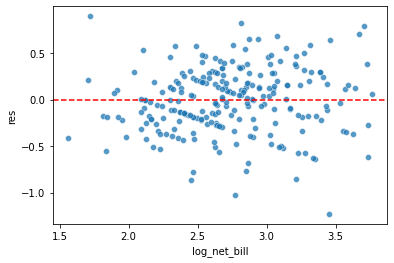

In [31]:
tips['res'] = reg_5.resid

sns.scatterplot(x = 'log_net_bill', y = 'res', data = tips[tips['log_net_bill']>1.3], alpha = .75)
plt.axhline(y=0, color='r', linestyle='--');

###  6. qual modelo resultou no melhor ajuste?

#### Apesar do modelo de regressão 5 [log (y) ~ log (x)] possuir um valor de R² de 0,89 e menor que o valor R²  de 0,98 do modelo de regressão 4 [log (y) ~ x]. O modelo 5 apresenta um padrão melhor de distribuição dos pontos de resíduos. 